# XOR Problem

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras import activations
from keras import optimizers

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras import activations
from keras import optimizers

# Variables
EPOCHS = 500  # 
HL_NEURONS = 2  # 
LearningRates = np.array([0.05, 0.25, 0.5, 1, 2])
LR = 0.03
MOMENTUM = 0  # Best - 0.5
SHUFFLE = False  # 
# LOSS_TARGET = 0.1

# Data
training_data = np.array([[0, 0], [1, 1], [0, 1], [1, 0]], dtype=np.float32)
target_data   = np.array([[1, 0], [1, 0], [0, 1], [0, 1]], dtype=np.float32)

In [24]:
# Model
def modelo(LR, MOMENTUM, SHUFFLE, BINARY = True):
    model = Sequential()
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(2, activation='softmax'))


    model.compile(  loss=tf.keras.metrics.categorical_crossentropy, 
                    optimizer=optimizers.SGD(
                        learning_rate=LR,
                        momentum=MOMENTUM),
                    metrics=['accuracy'])

    history = model.fit(training_data,
                        target_data,
                        # shuffle=SHUFFLE,
                        epochs=EPOCHS,
                        verbose=0) #, use_multiprocessing=True)
    return model, history

0.05
0.25
0.5
1.0
2.0


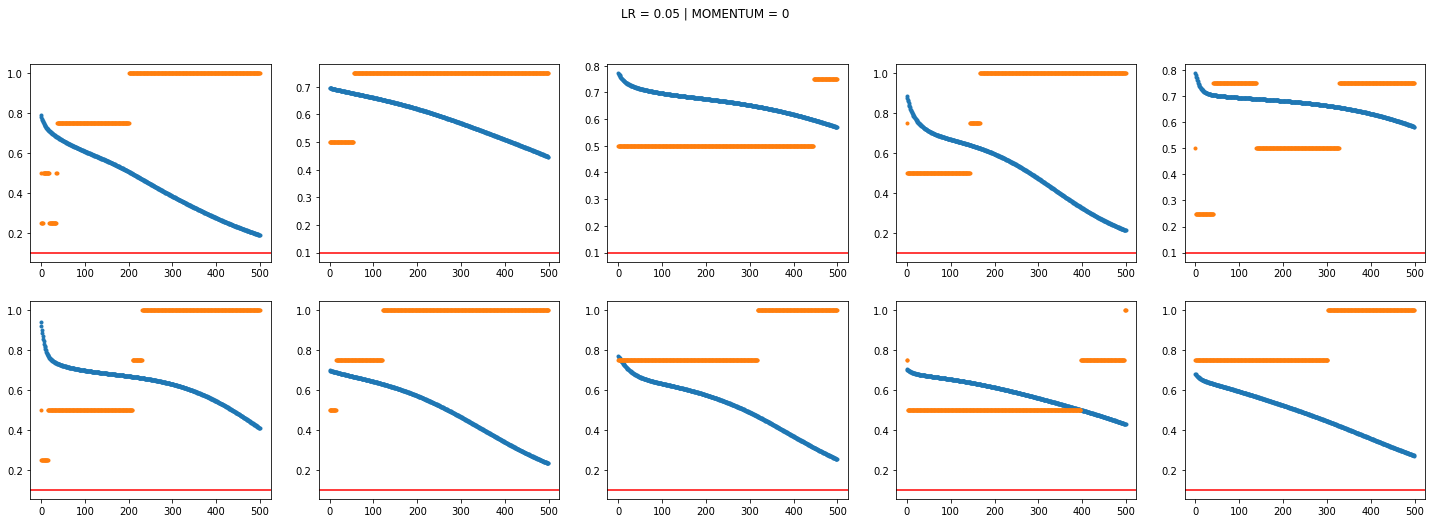

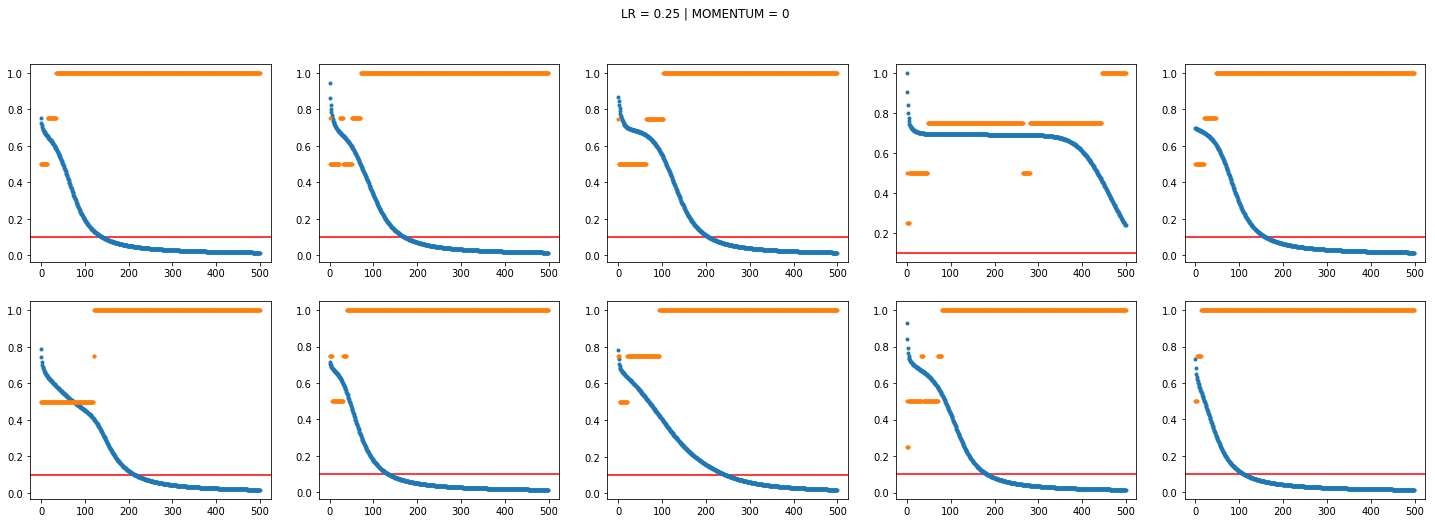

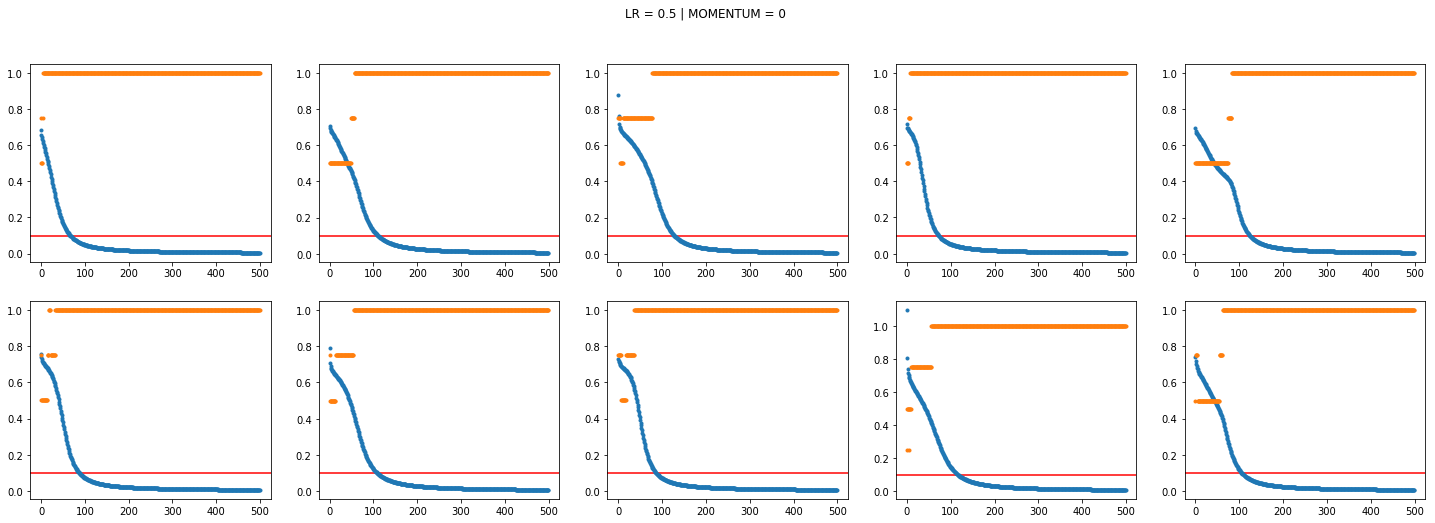

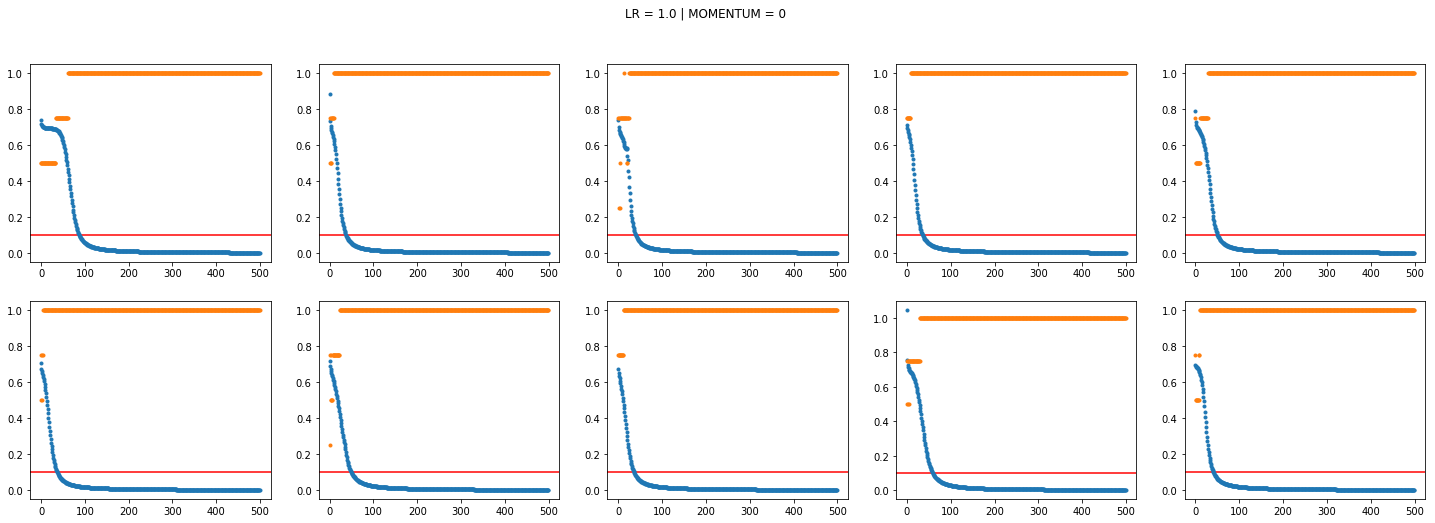

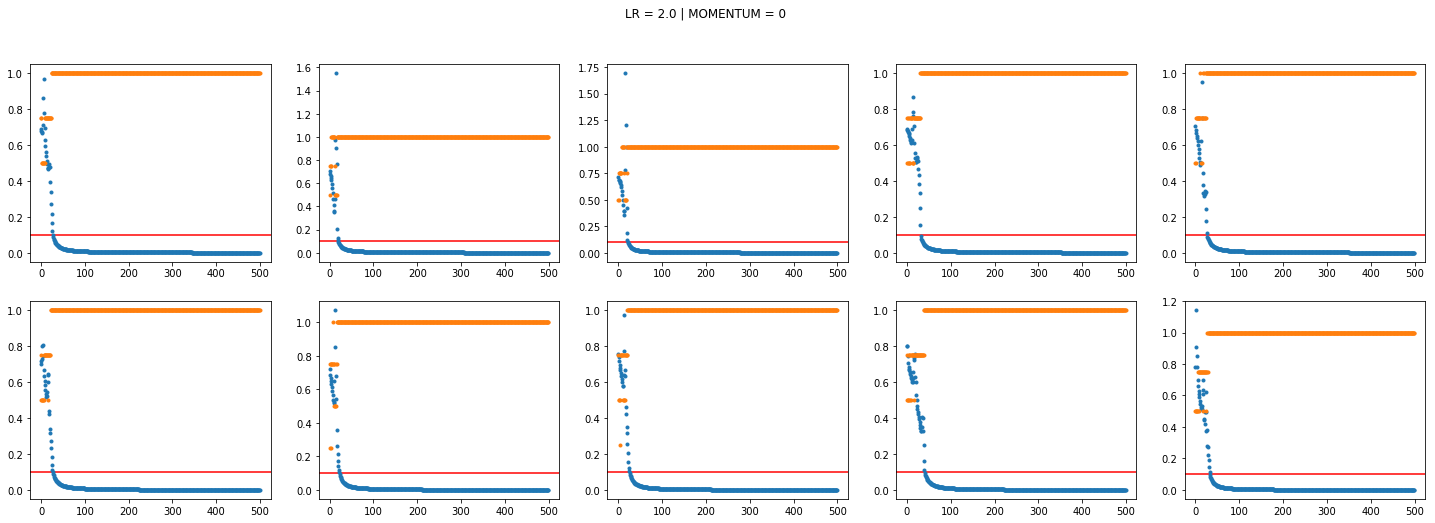

In [38]:
# MOMENTUM = 0  # Best - 0.5
# SHUFFLE = False  
# BINARY = True
def tests(MOMENTUM, SHUFFLE, BINARY = True):
    historys = [] 
    listt = []

    for lr in range(len(LearningRates)):
        print(LearningRates[lr])

        fig, plots = plt.subplots(2, 5, figsize=(25, 8))
        fig.suptitle(f'LR = {LearningRates[lr]} | MOMENTUM = {MOMENTUM}')

        for i in range(2):
            for j in range(5):

                model, history = modelo(LearningRates[lr], MOMENTUM, SHUFFLE, BINARY = True)
                listt.append(history.history['loss'][-1])
                plots[i, j].axhline(y = 0.1, color = 'r', linestyle = '-') # objetivo minimo da loss

                plots[i, j].plot(np.array(history.history['loss']), '.')
                plots[i, j].plot(np.array(history.history['accuracy']), '.')
        historys.append(listt)

    plt.show()
    return historys
    
historys = tests(MOMENTUM, SHUFFLE)

In [34]:
len(historys)

1

In [35]:
historys

[[0.3344934582710266,
  0.6105882525444031,
  0.5891361236572266,
  0.2045152187347412,
  0.36205828189849854,
  0.35314515233039856,
  0.5004749298095703,
  0.5331403613090515,
  0.45876145362854004,
  0.32427579164505005]]

In [19]:
print(history.history['loss'][-1])

0.2583300769329071


In [ ]:
print("\n\nresukltado:")
pred = model.predict(training_data)
for name, valor in zip('vdd, predict'.split(','),[target_data, pred]):
    print()
    print(name)
    print(valor)

# XOR Problem - sklearn

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras import activations
from keras import optimizers

from sklearn.neural_network import MLPClassifier


In [7]:
# Variables
EPOCHS = 500  # 
HL_NEURONS = 2  # 
LearningRates = np.array([0.05, 0.25, 0.5, 1, 2])
LR = 0.03
MOMENTUM = 0  # Best - 0.5
SHUFFLE = False  # 
# LOSS_TARGET = 0.1

# Data
training_data = np.array([[0, 0], [1, 1], [0, 1], [1, 0]], dtype=np.float32)
target_data   = np.array([[1, 0], [1, 0], [0, 1], [0, 1]], dtype=np.float32)
test_data = np.array([0, 0], dtype=np.float32)

In [10]:
clf = MLPClassifier(random_state=1, 
                    max_iter=300).fit(training_data, target_data)

# clf.predict_proba(test_data[:1])

C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(max_iter=300, random_state=1)